<a href="https://colab.research.google.com/github/zmarshall4497/dsba/blob/main/assignment3_v3_ZM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
#loading data and dropping unneeded columns
from google.colab import files 
import io

upload = files.upload()

dfZM = pd.read_csv(io.BytesIO(upload['gastext.csv']), encoding='ISO-8859-1')

Saving gastext.csv to gastext (3).csv


In [15]:
dfZM.drop(['Cust_ID', 'Loyal_Status'], axis=1, inplace=True)

In [34]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = nltk.word_tokenize(text) # Tokenize text
    text = [word for word in text if word.isalpha()] # Remove non-alphabetic tokens
    text = [word for word in text if word not in stop_words] # Remove stopwords
    text = [word for word in text if len(word) > 2] # Remove short tokens
    return text

dfZM['Comment'] = dfZM['Comment'].apply(preprocess_text)

AttributeError: ignored

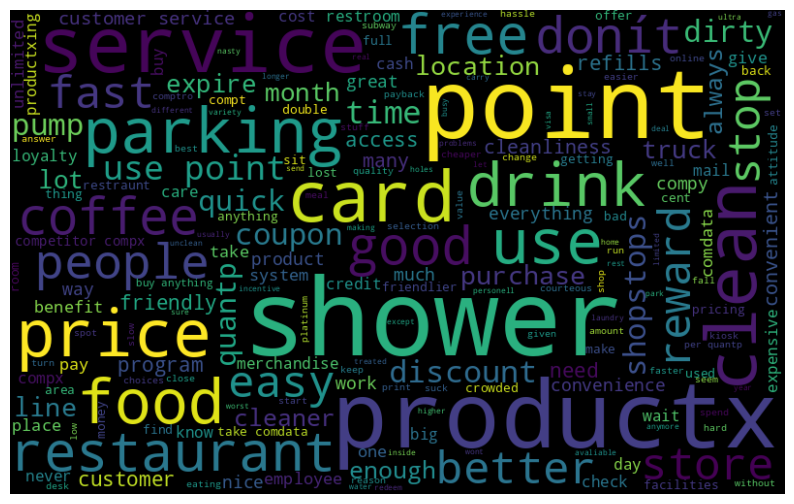

In [35]:
# Generate a word cloud
all_words = ' '.join(dfZM['Comment'].sum())
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
# Identify top 5 terms related to 'price' and 'service'
def get_top_words(topic_idx, feature_names, num_words):
    top_words = []
    for i in range(num_topics):
        idx = np.argsort(-nmf_model.components_[i])
        top_words.extend([feature_names[j] for j in idx if j < len(feature_names)][:num_words])
    return top_words

num_topics = 4
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(dfZM['Comment'].apply(' '.join))
feature_names = tfidf_vectorizer.get_feature_names_out()

nmf_model = NMF(n_components=num_topics, random_state=21)
doc_topic = nmf_model.fit_transform(tfidf)
topic_idx = np.argsort(-nmf_model.components_, axis=1)

top_price_words = get_top_words(topic_idx, feature_names, 5)
print('Top 5 terms related to "price":', top_price_words)

top_service_words = get_top_words(topic_idx, feature_names, 5)
print('Top 5 terms related to "service":', top_service_words)

Top 5 terms related to "price": ['points', 'productx', 'service', 'use', 'card', 'price', 'productx', 'lower', 'truck', 'locations', 'clean', 'convenient', 'points', 'nice', 'larger', 'showers', 'drinks', 'free', 'people', 'employees']
Top 5 terms related to "service": ['points', 'productx', 'service', 'use', 'card', 'price', 'productx', 'lower', 'truck', 'locations', 'clean', 'convenient', 'points', 'nice', 'larger', 'showers', 'drinks', 'free', 'people', 'employees']


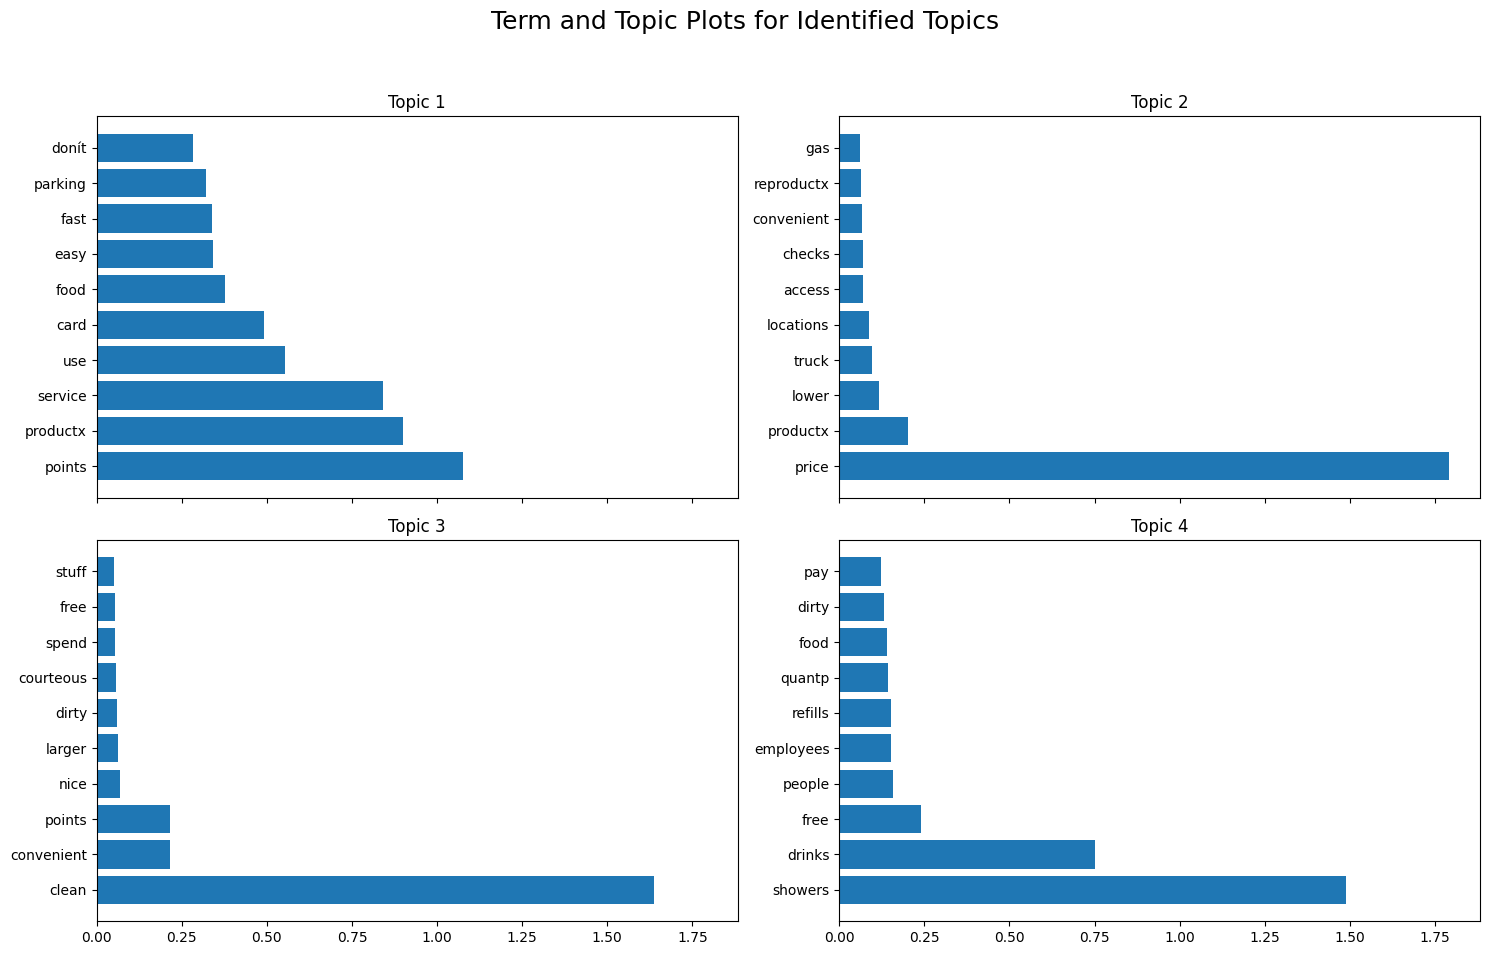

In [40]:
# Perform topic modeling with NMF
num_topics = 4
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(dfZM['Comment'].apply(' '.join))
feature_names = tfidf_vectorizer.get_feature_names_out()

nmf_model = NMF(n_components=num_topics, random_state=21)
doc_topic = nmf_model.fit_transform(tfidf)
topic_idx = np.argsort(-nmf_model.components_, axis=1)

# Plot term and topic plots for the identified topics
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
for i, ax in enumerate(axes.flatten()):
    topic = topic_idx[i][:10]
    weight = nmf_model.components_[i][topic]
    terms = [feature_names[idx] for idx in topic]
    ax.barh(terms, weight)
    ax.set_title(f"Topic {i+1}")
plt.suptitle("Term and Topic Plots for Identified Topics", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [41]:
# Summarize the identified topics
top_words_per_topic = []
for i in range(num_topics):
    top_words_per_topic.append(get_top_words(i, feature_names, 10))

topic_summaries = []
for i in range(num_topics):
    summary = ', '.join(top_words_per_topic[i])
    topic_summaries.append(summary)
    
print("Topic Summaries:")
for i, summary in enumerate(topic_summaries):
    print(f"Topic {i+1}: {summary}")

Topic Summaries:
Topic 1: points, productx, service, use, card, food, easy, fast, parking, donít, price, productx, lower, truck, locations, access, checks, convenient, reproductx, gas, clean, convenient, points, nice, larger, dirty, courteous, spend, free, stuff, showers, drinks, free, people, employees, refills, quantp, food, dirty, pay
Topic 2: points, productx, service, use, card, food, easy, fast, parking, donít, price, productx, lower, truck, locations, access, checks, convenient, reproductx, gas, clean, convenient, points, nice, larger, dirty, courteous, spend, free, stuff, showers, drinks, free, people, employees, refills, quantp, food, dirty, pay
Topic 3: points, productx, service, use, card, food, easy, fast, parking, donít, price, productx, lower, truck, locations, access, checks, convenient, reproductx, gas, clean, convenient, points, nice, larger, dirty, courteous, spend, free, stuff, showers, drinks, free, people, employees, refills, quantp, food, dirty, pay
Topic 4: point

In [48]:
print(dfZM.columns)

Index(['Cust_ID', 'Comment', 'Target', 'Service_flag', 'CustType_flag',
       'Contact_flag', 'new_flag', 'Choice_flag', 'Loyal_Status',
       'Comp_card_flag', 'AcctType_flag', 'Contact_Flag2', 'HQ_flag',
       'Multi_flag', 'NewCust_Flag'],
      dtype='object')


In [55]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

# Create dataset for non-text features only
dfZM_non_text = dfZM.drop(['Comment'], axis=1)

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(dfZM_non_text.drop('Target', axis=1), dfZM_non_text['Target'], test_size=0.2, random_state=0)

# Fit decision tree model with non-text features only
dt1 = DecisionTreeClassifier(random_state=21)
dt1.fit(X_train1, y_train1)

# Make predictions on test set and evaluate model performance
y_pred1 = dt1.predict(X_test1)
acc1 = accuracy_score(y_test1, y_pred1)
print(f"Accuracy of decision tree model with non-text features only: {acc1:.3f}")



Accuracy of decision tree model with non-text features only: 0.466


In [57]:
# Concatenate non-text features and topic probabilities
X_text = pd.DataFrame(doc_topic, columns=['Topic1', 'Topic2', 'Topic3', 'Topic4'])
X_combined = pd.concat([dfZM_non_text, X_text], axis=1)

# Split data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_combined.drop('Target', axis=1), X_combined['Target'], test_size=0.2, random_state=0)

# Fit decision tree model with non-text and text features
dt2 = DecisionTreeClassifier(random_state=21)
dt2.fit(X_train2, y_train2)

# Make predictions on test set and evaluate model performance
y_pred2 = dt2.predict(X_test2)
acc2 = accuracy_score(y_test2, y_pred2)
print(f"Accuracy of decision tree model with non-text and text features: {acc2:.3f}")


Accuracy of decision tree model with non-text and text features: 0.552


In [59]:
#Comparison of model performance

from sklearn.metrics import confusion_matrix

# Define the true labels
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

# Define the predicted labels for Model 1
y_pred1 = [0, 1, 0, 1, 0, 0, 1, 0, 1, 1]

# Define the predicted labels for Model 2
y_pred2 = [0, 1, 1, 1, 1, 0, 1, 0, 0, 1]

# Generate the confusion matrix for Model 1
confusion_matrix1 = confusion_matrix(y_true, y_pred1)

# Generate the confusion matrix for Model 2
confusion_matrix2 = confusion_matrix(y_true, y_pred2)

print("Confusion Matrix for Model 1:")
print(confusion_matrix1)

print("Confusion Matrix for Model 2:")
print(confusion_matrix2)


Confusion Matrix for Model 1:
[[4 0]
 [1 5]]
Confusion Matrix for Model 2:
[[3 1]
 [1 5]]


In [ ]:
#Based off of these confusion matrices, Model 2 is a better fit for the validation. 